# Breast Cancer Dataset Overview

This dataset contains features related to breast cancer diagnosis, with each row representing a tumor sample. It includes the following columns:

- **id**: Unique identifier for each sample.
- **diagnosis**: Tumor classification (`M` for malignant, `B` for benign).
- **radius_mean, texture_mean, perimeter_mean, area_mean**: Average measurements for various tumor characteristics.
- **smoothness_mean, compactness_mean, concavity_mean, concave points_mean**: Statistical measures representing the tumor's smoothness, compactness, concavity, and concave points.
- **texture_worst, perimeter_worst, area_worst**: Worst-case (maximum) values for various tumor characteristics.
- **symmetry_worst, fractal_dimension_worst**: Worst-case values for tumor symmetry and fractal dimension.
- **Unnamed: 32**: Contains NaN values and is generally excluded from analysis.

## Key Points:
- **Diagnosis** (`M` or `B`) is the target variable, used to classify tumors as malignant or benign.
- The dataset provides both mean and worst-case measurements for tumor size, shape, and texture.


In [40]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


### 1. Importing the Dataset:
#### Load the dataset from a CSV file and display the first few rows to understand its structure.


In [41]:
filePath = '/Users/ahmedehab/Desktop/breast cancer DS/data.csv'
df = pd.read_csv(filePath)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### 2. Exploratory Data Analysis (EDA):

In [42]:
# Display basic info about the dataset, such as data types and missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [43]:
# Show summary statistics to understand the distribution of numerical features.

df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [44]:
# Check for missing values in the dataset.
missing_data = df.isnull()

# Check for missing values in the dataset.
missing_data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [45]:
# Check if there are any missing values in the dataset.

missing_data.isnull().sum()


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
Unnamed: 32                0
dtype: int64

In [46]:
# The 'Unnamed: 32' column contains only NaN values, so we will drop it along with the 'id' column since it's not necessary for the analysis.

df.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [47]:
# Convert the 'diagnosis' column into a binary format, where 'M' (malignant) is encoded as 1 and 'B' (benign) as 0.

df.diagnosis = [1 if value == 'M' else 0 for value in df.diagnosis]


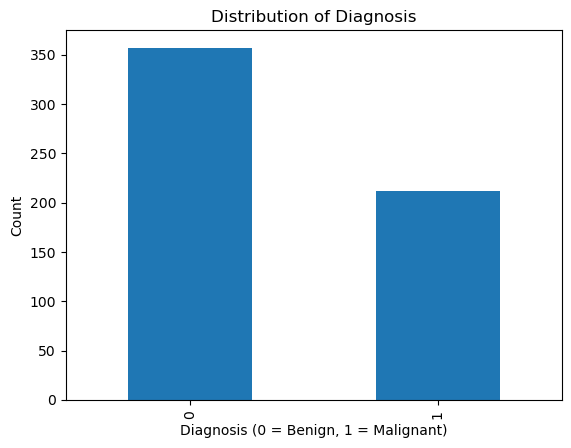

In [48]:
# Visualize the distribution of the target variable 'diagnosis' (malignant vs benign).

df['diagnosis'].value_counts().plot(kind='bar')
plt.title('Distribution of Diagnosis')
plt.ylabel('Count')
plt.xlabel('Diagnosis (0 = Benign, 1 = Malignant)')
plt.show()


### 3. Feature and Target Separation:
#### Now, let's separate the features (X) from the target variable (Y).

In [49]:
# Separate target variable (diagnosis) from features
X = df.drop(['diagnosis'], axis=1)  # Features (excluding diagnosis)
Y = df['diagnosis']  # Target variable (diagnosis)


In [50]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [51]:
# Features: All columns except 'diagnosis'.
X = df.drop(['diagnosis'], axis=1)  # Drop the 'diagnosis' column to get features
Y = df['diagnosis']  # The 'diagnosis' column is our target variable

### 5. Splitting the Data:
#### Now, let's split the data into training and testing sets. We'll use 80% for training and 20% for testing.
##### split the data

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=42)


### 6. Model Training and Evaluation:
#### Let's train a Logistic Regression model on the training data and evaluate its performance on the test data.

In [53]:
# Initialize the Logistic Regression model.
model = LogisticRegression()

# Train the model on the training data.
model.fit(X_train, y_train)

# Predict the labels for the test data.
y_pred = model.predict(X_test)

## Model Evaluation

In [54]:
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuray: {accuracy: .2f}")

Accuray:  0.98


In [55]:
# Generate a classification report to evaluate the model's performance in more detail (precision, recall, F1-score).
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



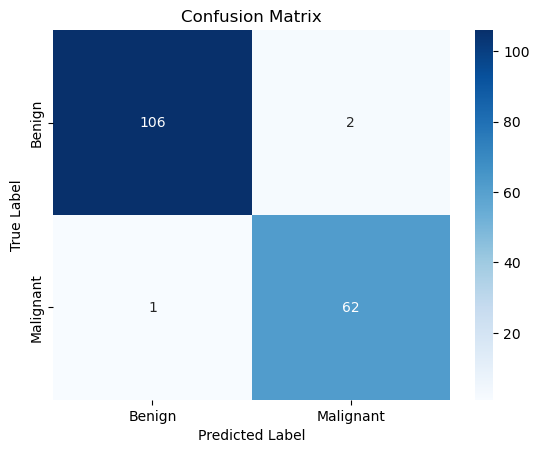

In [56]:
# Visualize the confusion matrix to see the performance of the classification model in terms of true positives, false positives, etc.

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Conclusion: Model Performance Evaluation

The performance of the classification model has been evaluated using multiple metrics. Below is a summary of the evaluation:

### Classification Report:
- **Precision**: 
  - For class 0 (benign): 0.99
  - For class 1 (malignant): 0.97
- **Recall**:
  - For class 0 (benign): 0.98
  - For class 1 (malignant): 0.98
- **F1-Score**:
  - For class 0 (benign): 0.99
  - For class 1 (malignant): 0.98
- **Accuracy**: 98% (Overall, the model correctly classified 98% of instances)

### Macro Average:
- Precision: 0.98
- Recall: 0.98
- F1-Score: 0.98

### Weighted Average:
- Precision: 0.98
- Recall: 0.98
- F1-Score: 0.98


### Insights:
- **Accuracy**: The model has achieved a high accuracy of 98%, indicating that it correctly predicted the class for 98% of the data points.
- **Precision & Recall**: The precision and recall values are very high for both classes. Class 0 (Benign) has a slightly higher precision, while both classes have almost identical recall values, indicating that the model is very reliable in detecting both benign and malignant cases.
- **F1-Score**: The model maintains a good balance between precision and recall, with a high F1-score for both classes, particularly for Class 0 (Benign), where the F1-score is 0.99.
- **Confusion Matrix**: The confusion matrix shows only 3 misclassifications: 2 false positives and 1 false negative. This highlights that the model is generally accurate in its predictions.

### Conclusion:
Overall, the model exhibits excellent performance in distinguishing between benign and malignant cases. It achieves high accuracy, precision, recall, and F1-score, making it suitable for practical use in classifying medical data such as breast cancer diagnosis.

